In [1]:
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [2]:
from rdkit import Chem
from rdkit.Chem import Mol
from rdkit.Chem import inchi

def is_same_mol(mol1: Mol, mol2: Mol):
    inchi1 = inchi.MolToInchiKey(mol1)
    inchi2 = inchi.MolToInchiKey(mol2)
    return inchi1 == inchi2

def print_atoms_and_labels(mol: Mol):
    for a in mol.GetAtoms():
        text = a.GetSymbol() + ", MapNum: " + str(a.GetAtomMapNum())
        if a.HasProp('atomLabel'):
            text += ", label: " + a.GetProp("atomLabel")
        print(text)

In [163]:
%load_ext autoreload
%autoreload 2
from utils import MonomersLib, HELMConverter

monomers_lib_path = molgen_path + "data/helm/library/chembl_35_monomer_library.xml"
lib = MonomersLib.load(monomers_lib_path)
converter = HELMConverter(lib)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[14:35:11] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:35:11] WARNING: not removing hydrogen atom with dummy atom neighbors


True


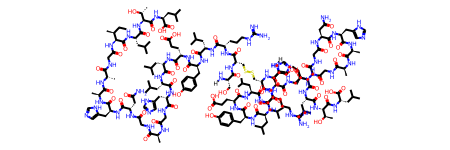

In [164]:
# helm = "PEPTIDE1{G.R.G.D.S.P}$$$$"
# helm = "PEPTIDE1{A.A.A}$$$$"
# helm = "PEPTIDE1{A}$$$$"
# helm = "PEPTIDE1{K.F.Y.C.N.G.K.R.V.C.V.C.R.[am]}$$$$"
# helm = "PEPTIDE1{[ac].Y.[dC].[dD].[dP].[dC]}$PEPTIDE1,PEPTIDE1,6:R3-3:R3$$$"
helm = "PEPTIDE1{S.C.R.L.Y.E.L.L.H.G.A.G.N.H.A.A.G.I.L.T.L}|PEPTIDE2{S.C.R.L.Y.E.L.L.H.G.A.G.N.H.A.A.G.I.L.T.L}$PEPTIDE2,PEPTIDE1,2:R3-2:R3$$$"

mol = converter.convert(helm)
mol_h = Chem.MolFromHELM(helm)
print(is_same_mol(mol, mol_h))
mol